# 🐧 K-Nearest Neighbors (KNN) Classification Using the Palmer Penguins Dataset

This notebook demonstrates how the **K-Nearest Neighbors (KNN)** algorithm works by applying it to the real-world **Palmer Penguins** dataset.

## 📌 What is K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for classification and regression.

In **classification**, KNN works by:
1. Looking at the new data point we want to classify.
2. Finding the **k closest points** in the training dataset.
3. Checking which class appears **most frequently** among those neighbors.
4. Assigning that class to the new point.

💡 KNN does *not* build a complex model or equation.
It makes decisions purely based on **distance** in feature space.

This makes it:
- very intuitive,
- easy to visualize,
- and great for teaching how classification works.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [40]:
penguins = pd.read_csv("penguins.csv")

penguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [41]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [42]:
penguins.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
# Basic cleaning and info

# Some versions have an index column like "Unnamed: 0"
if "Unnamed: 0" in penguins.columns:
    penguins = penguins.drop(columns=["Unnamed: 0"])

# We will focus on species + 4 numeric features
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# Drop rows with missing values in these key columns
penguins = penguins.dropna(subset=["species"] + features)

print("Dataset info:")
penguins.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               342 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.0+ KB


In [ ]:
# Summary stats + unique counts

display(penguins.describe())

print("\nNumber of unique values per column:")
display(penguins.nunique())

print("\nSpecies counts:")
display(penguins["species"].value_counts())


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000



Number of unique values per column:


species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64


Species counts:


species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

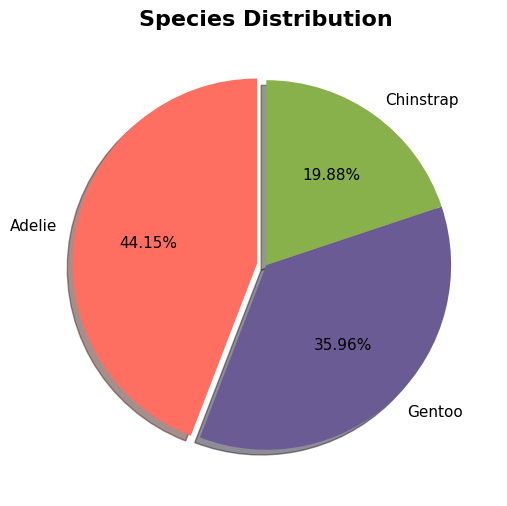

In [ ]:
# Species distribution (pie chart)

species_counts = penguins["species"].value_counts()

plt.figure(figsize=(6, 6))
plt.title("Species Distribution", fontsize=16, fontweight="bold")

colors = ["#FF6F61", "#6B5B95", "#88B04B"]  # just some nice colors

plt.pie(
    species_counts.values,
    labels=species_counts.index,
    autopct="%.2f%%",
    startangle=90,
    colors=colors,
    explode=[0.05] + [0] * (len(species_counts) - 1),
    shadow=True,
    textprops={"fontsize": 11}
)
plt.show()


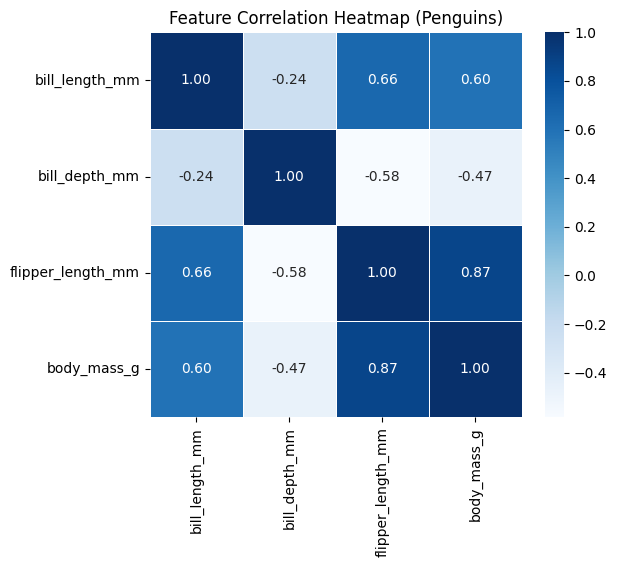

In [58]:
# Correlation heatmap of numeric features
plt.figure(figsize=(6, 5))
corr = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap (Penguins)")
plt.show()


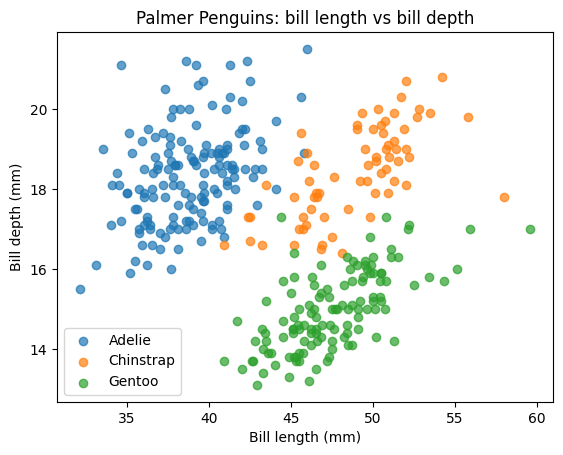

In [ ]:
# Simple 2D visualization (raw features)

plt.figure()
for species, group in penguins.groupby("species"):
    plt.scatter(group["bill_length_mm"], group["bill_depth_mm"], label=species, alpha=0.7)

plt.xlabel("Bill length (mm)")
plt.ylabel("Bill depth (mm)")
plt.title("Palmer Penguins: bill length vs bill depth")
plt.legend()
plt.show()

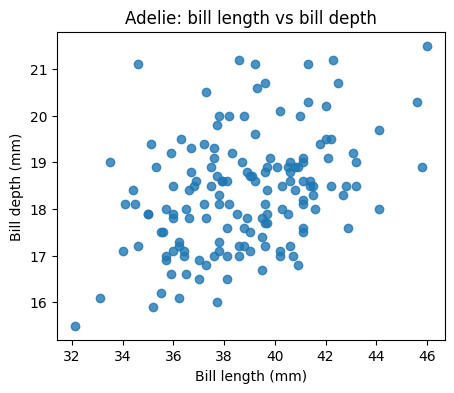

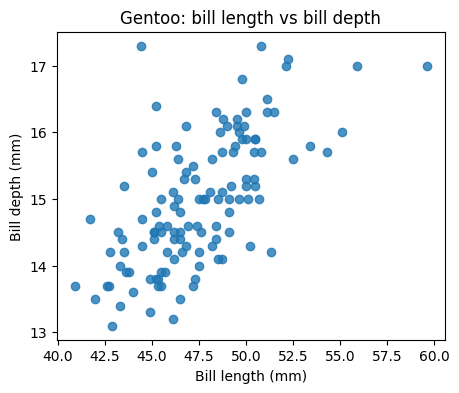

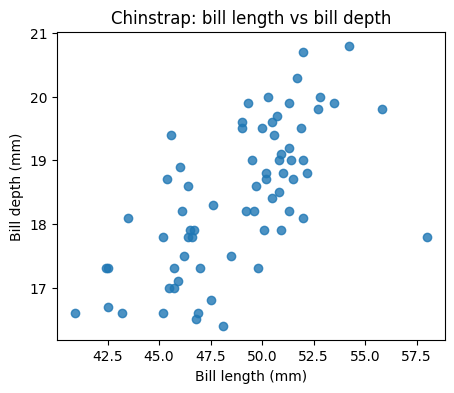

In [ ]:
# Separate scatter for each species

for sp in penguins["species"].unique():
    subset = penguins[penguins["species"] == sp]
    plt.figure(figsize=(5, 4))
    plt.scatter(subset["bill_length_mm"], subset["bill_depth_mm"], alpha=0.8)
    plt.xlabel("Bill length (mm)")
    plt.ylabel("Bill depth (mm)")
    plt.title(f"{sp}: bill length vs bill depth")
    plt.show()


In [ ]:
# Prepare data for KNN

X = penguins[["bill_length_mm", "bill_depth_mm"]]          # 2D features for easy visualization
y = penguins["species"]

# Encode species labels as numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train a basic KNN model (k = 5) and evaluate

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(f"Accuracy for k={k}: {accuracy_score(y_test, y_pred):.3f}")
print()
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_.tolist()))


Accuracy for k=5: 0.957

Classification report:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       0.87      0.93      0.90        14
      Gentoo       0.96      0.92      0.94        25

    accuracy                           0.96        69
   macro avg       0.94      0.95      0.95        69
weighted avg       0.96      0.96      0.96        69



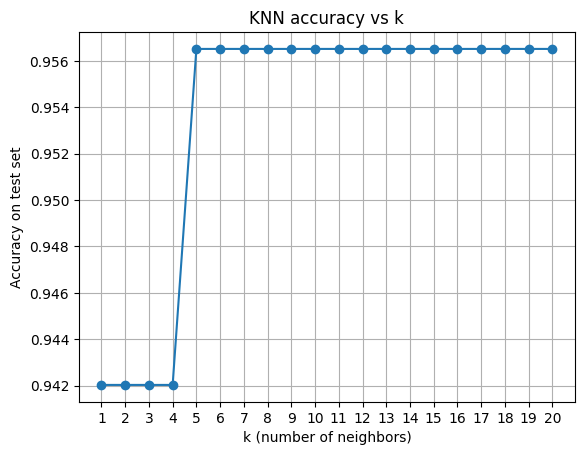

In [ ]:
# How accuracy changes with k

k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, preds))

plt.figure()
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy on test set")
plt.title("KNN accuracy vs k")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
# Decision boundary helper function

def plot_decision_boundary(k, X_train_scaled, y_train, title_suffix=""):
    # Create a grid of points covering the feature space
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # Train KNN with this k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure()
    # background: predicted class region
    plt.contourf(xx, yy, Z, alpha=0.3)

    # training points
    scatter = plt.scatter(
        X_train_scaled[:, 0],
        X_train_scaled[:, 1],
        c=y_train,
        alpha=0.8
    )

    plt.xlabel("Standardized bill length")
    plt.ylabel("Standardized bill depth")
    plt.title(f"KNN decision boundary (k={k}) {title_suffix}")
    # legend using species names
    handles, _ = scatter.legend_elements()
    labels = label_encoder.inverse_transform(sorted(set(y_train)))
    plt.legend(handles, labels, title="Species")
    plt.show()


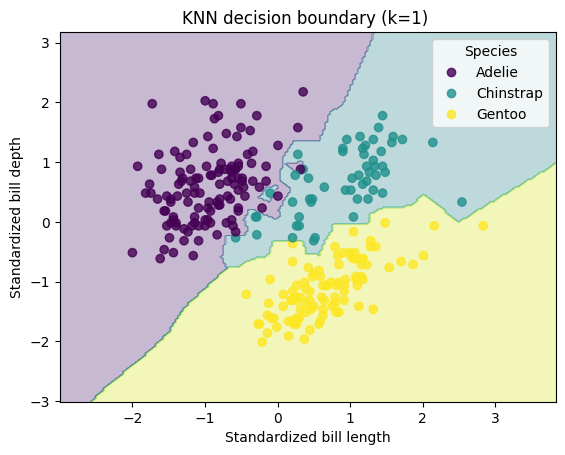

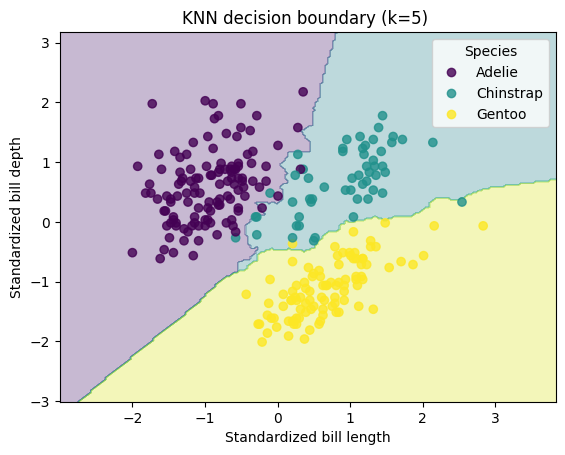

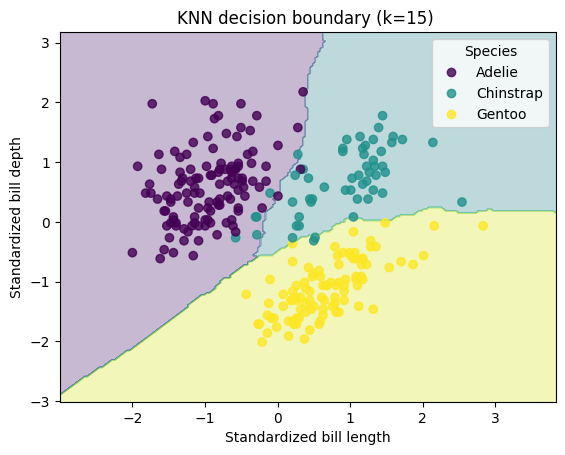

In [ ]:
# Decision boundaries for different k

for k in [1, 5, 15]:
    plot_decision_boundary(k, X_train_scaled, y_train, title_suffix="")


True species:      Gentoo
Predicted species: Gentoo


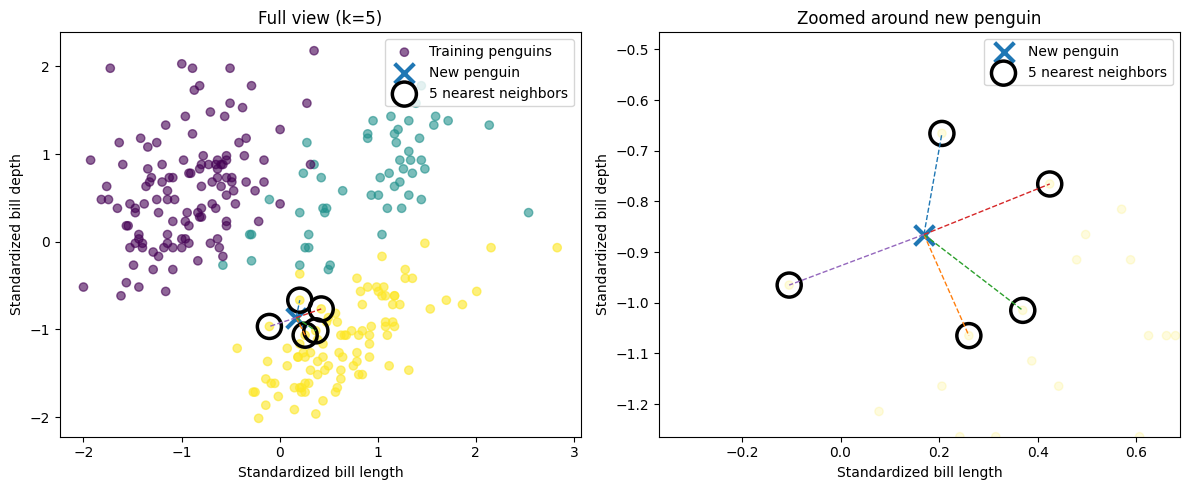

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Pick one test example (change idx to see different penguins)
idx = 60
query_point = X_test_scaled[idx].reshape(1, -1)
true_label = y_test[idx]
true_species = label_encoder.inverse_transform([true_label])[0]

# Find its k nearest neighbors in the training set
distances, indices = knn.kneighbors(query_point)

predicted_label = knn.predict(query_point)[0]
predicted_species = label_encoder.inverse_transform([predicted_label])[0]

print(f"True species:      {true_species}")
print(f"Predicted species: {predicted_species}")

neighbor_points = X_train_scaled[indices[0]]

# make a big figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# LEFT: full view 
ax = axes[0]
scatter = ax.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train,
    alpha=0.6,
    label="Training penguins"
)

# New penguin
ax.scatter(
    query_point[0, 0],
    query_point[0, 1],
    marker="x",
    s=200,
    linewidths=3,
    label="New penguin"
)

# Neighbors (big hollow circles)
ax.scatter(
    neighbor_points[:, 0],
    neighbor_points[:, 1],
    s=300,
    facecolors="none",
    edgecolors="black",
    linewidths=2.5,
    label=f"{k} nearest neighbors"
)

# Lines from neighbors to new point
for p in neighbor_points:
    ax.plot(
        [query_point[0, 0], p[0]],
        [query_point[0, 1], p[1]],
        linestyle="dashed",
        linewidth=1
    )

ax.set_xlabel("Standardized bill length")
ax.set_ylabel("Standardized bill depth")
ax.set_title(f"Full view (k={k})")
ax.legend()

# ---------- RIGHT: zoomed view around neighbors + new point ----------
ax_zoom = axes[1]

ax_zoom.scatter(
    X_train_scaled[:, 0],
    X_train_scaled[:, 1],
    c=y_train,
    alpha=0.15,   # lighter, so neighbors stand out
)

# New penguin
ax_zoom.scatter(
    query_point[0, 0],
    query_point[0, 1],
    marker="x",
    s=200,
    linewidths=3,
    label="New penguin"
)

# Neighbors (big hollow circles)
ax_zoom.scatter(
    neighbor_points[:, 0],
    neighbor_points[:, 1],
    s=300,
    facecolors="none",
    edgecolors="black",
    linewidths=2.5,
    label=f"{k} nearest neighbors"
)

# Lines from neighbors to new point
for p in neighbor_points:
    ax_zoom.plot(
        [query_point[0, 0], p[0]],
        [query_point[0, 1], p[1]],
        linestyle="dashed",
        linewidth=1
    )

# Compute zoom limits based on neighbors
x_min = min(neighbor_points[:, 0].min(), query_point[0, 0])
x_max = max(neighbor_points[:, 0].max(), query_point[0, 0])
y_min = min(neighbor_points[:, 1].min(), query_point[0, 1])
y_max = max(neighbor_points[:, 1].max(), query_point[0, 1])

# small margin around them
x_margin = (x_max - x_min) * 0.5 if x_max > x_min else 0.5
y_margin = (y_max - y_min) * 0.5 if y_max > y_min else 0.5

ax_zoom.set_xlim(x_min - x_margin, x_max + x_margin)
ax_zoom.set_ylim(y_min - y_margin, y_max + y_margin)

ax_zoom.set_xlabel("Standardized bill length")
ax_zoom.set_ylabel("Standardized bill depth")
ax_zoom.set_title("Zoomed around new penguin")
ax_zoom.legend()

plt.tight_layout()
plt.show()


## ✅ Final Conclusion

The Palmer Penguins dataset is an excellent real-world example for demonstrating KNN.
Because the species form clear clusters, KNN performs well and is easy to visualize.

Overall:
- KNN is **simple**, **intuitive**, and **works best when similar points cluster together**.
- Proper **scaling** and **choosing the right k** are essential for good performance.
- Visualization plays a huge role in understanding how KNN behaves.